In [1]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [3]:
%run ../test/test_algorithms.py

......................
----------------------------------------------------------------------
Ran 22 tests in 0.109s

OK


In [4]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.035s

OK


In [5]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.013s

OK


In [6]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [7]:
%run ../test/test_activate.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 24, 30)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(150)

In [ ]:
op0.show_performance()

In [ ]:
op0.save_model()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## Whole system test - I am alive v.3

In [1]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [ ]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [ ]:
training = training.get_close()

In [ ]:
#real = DataLoader('aapl', '2010-05-01', '2010-05-28')

In [ ]:
#real = real.get_close()

In [ ]:
#len(real)

In [2]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [3]:
predict = predict.get_close()

In [4]:
predict_req, real = data_prep(predict, 24, 30)

In [ ]:
# print(predict.to_string()) useful to investigate dataframes

In [ ]:
predict_req

In [ ]:
real

In [ ]:
final_df1 = individual_predictors1(training, predict_req, 30)

In [ ]:
final_df2 = individual_predictors2(training, predict_req, 30)

In [ ]:
final_df3 = individual_predictors3(training, predict_req, 30)

In [ ]:
final_df3

In [ ]:
final_df4 = individual_predictors4(training, predict_req, 30)

In [ ]:
final_df5 = individual_predictors5(training, 20)

In [5]:
final_df6 = individual_predictors_pretrained1(predict_req, 30)

In [ ]:
test = evaluation_frame(final_df6, real)
test.head(n=3)

In [ ]:
def absolute_error_analytics(predictors: DataFrame, algorithms: DataFrame, real: DataFrame) -> DataFrame:
    '''Computes the absolute error values of all individual predictors and consensus algorithms. Additionally adds system disagreement and individual predictors disagreement scores.
    
        Parameters
        ----------
            predictors (DataFrame): DataFrame containing individual predictors forecasts.
            algorithms (DataFrame): DataFrame containing consensus algorithm forecasts.
            real (DataFrame): DataFrame containing actual future values.
        
        Returns
        -------
            (DataFrame): DataFrame containing all absolute error values of individual predictors and consenus algorithms togehter with system disagreement and individual disagreement scores.
    '''
    data = evaluation_frame(predictors,real)
    
    data2 = evaluation_frame(algorithms, real)
    
    individual_disagreements = predictor_score(predictors)
    individual_disagreements = set_same_index(individual_disagreements, real)
    
    system_disagreement = disagreement(predictors)
    system_disagreement = set_same_index(system_disagreement, real)

    result = pd.DataFrame() 
    for i in range(len(data.columns)-1): # do not include Real value column
        current_column = data.columns[i]
        result[current_column + ' absolute error'] = abs(data[current_column] - data['Real Value'])
        
    for i in range(len(data2.columns)-1):
        current_column = data2.columns[i]
        result[current_column + ' absolute error'] = abs(data2[current_column] - data2['Real Value'])
    
    result = pd.concat([result, individual_disagreements, system_disagreement], axis=1)
    
    return result

### System Disagreement

In [ ]:
system_disagreement(final_df1)

In [ ]:
system_disagreement(final_df2)

In [ ]:
system_disagreement(final_df3)

In [ ]:
system_disagreement(final_df4)

In [ ]:
system_disagreement(final_df5)

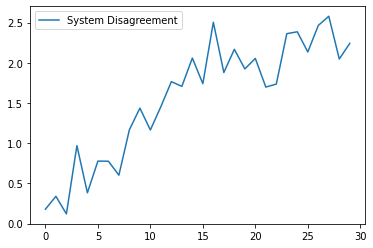

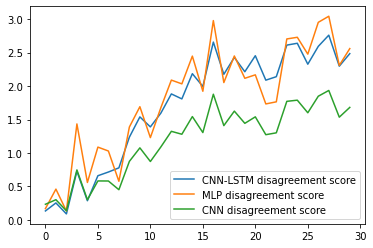

In [6]:
system_disagreement(final_df6)

### System consensus

In [ ]:
algos1 = consensus(final_df1, real)

In [ ]:
algos2 = consensus(final_df2, real)

In [ ]:
algos3 = consensus(final_df3, real)

In [ ]:
algos4 = consensus(final_df4, real)

In [ ]:
algos5 = consensus(final_df5, real)

In [7]:
algos6 = consensus(final_df6, real)

In [ ]:
ui1 = combined_frame(final_df1, algos1, real)

In [ ]:
ui2 = combined_frame(final_df2, algos2, real)

In [ ]:
ui3 = combined_frame(final_df3, algos3, real)

In [ ]:
ui4 = combined_frame(final_df4, algos4, real)

In [ ]:
ui5 = combined_frame(final_df5, algos5, real)

In [8]:
ui6 = combined_frame(final_df6, algos6, real)

In [ ]:
yu3 = all_stats_frame(ui3, final_df3)

In [9]:
yu = all_stats_frame(ui6, final_df6)

In [ ]:
yu3 = all_stats_frame(ui3, final_df3)

In [10]:
absolute_error_analytics(final_df6, algos6, real)

,CNN-LSTM absolute error,MLP absolute error,CNN absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,CNN-LSTM disagreement score,MLP disagreement score,CNN disagreement score,System Disagreement
Date,,,,,,,,,,,,
2010-07-06,0.237130,0.341953,0.062031,0.172351,0.172351,0.172351,0.172351,0.199793,0.134661,0.169602,0.234382,0.179548
2010-07-07,0.285410,0.333012,0.430103,0.127501,0.206471,0.166986,0.430103,0.117856,0.254372,0.460512,0.302603,0.339162
2010-07-08,0.491744,0.361291,0.632654,0.495230,0.488788,0.502988,0.491744,0.505887,0.090454,0.133939,0.137424,0.120606
2010-07-09,0.709064,1.411126,0.770011,0.022649,0.075740,0.048115,1.411126,0.358501,0.727046,1.433776,0.747362,0.969394
2010-07-12,0.927026,0.109152,0.971348,0.669175,0.734007,0.690140,0.927026,0.712865,0.287399,0.560023,0.302173,0.383198
2010-07-13,1.029194,0.719243,0.795888,0.368613,0.142298,0.364576,0.719243,0.083243,0.660581,1.087856,0.582812,0.777083
2010-07-14,1.347200,0.398313,0.945215,0.631368,0.583039,0.621207,0.398313,0.504932,0.715833,1.029680,0.581838,0.775784
2010-07-15,2.042048,0.686374,1.063202,1.263874,1.147056,1.242195,0.686374,1.173197,0.778173,0.577501,0.451891,0.602522
2010-07-16,2.212348,0.412017,1.127003,0.975778,0.747199,0.912454,0.412017,0.490695,1.236570,1.387795,0.874788,1.166385


In [ ]:
mat6 = correlation(yu)

In [ ]:
mat3 = correlation(yu3, True)

In [ ]:
mse_score(ui6, True)

In [ ]:
mse_log_score(ui6)

In [ ]:
mae_score(ui6)

In [ ]:
mse_score(ui2)

In [ ]:
mse_log_score(ui1)

In [ ]:
mae_score(ui2)

In [ ]:
mse_score(ui3)

In [ ]:
mse_log_score(ui3)

In [ ]:
mae_score(ui3)

In [ ]:
plot_performance(ui1)

In [ ]:
plot_performance(ui2)

In [ ]:
plot_performance(ui3)

In [ ]:
plot_performance(ui4)

In [ ]:
plot_performance(ui5)

In [ ]:
plot_performance(ui6)